#Predict what makes for a successful bike station

In [3]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 6.0)

In [5]:
weather = pd.read_table('daily_weather.tsv')
usage = pd.read_table('usage_2012.tsv')
stations = pd.read_table('stations.tsv')

#Compute the number of rentals per station per day

In [6]:
days = usage[['station_start', 'time_start']]
days['day'] = days['time_start'].str[5:10]
days['count'] = 1

/Users/jimgrant/.virtualenvs/bikeshare/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/jimgrant/.virtualenvs/bikeshare/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [7]:
new_stations = pd.merge(days, stations, left_on='station_start', right_on='station')

In [9]:
rentals_per_station = new_stations.groupby('station').size()

In [10]:
avg_rentals = rentals_per_station.apply(lambda x: x/366)
avg_rentals

station
10th & E St NW                                       17
10th & Monroe St NE                                  10
10th & U St NW                                       71
10th St & Constitution Ave NW                        55
11th & H St NE                                       35
11th & Kenyon St NW                                  61
12th & Army Navy Dr                                  10
12th & L St NW                                       23
12th & Newton St NE                                   3
13th & D St NE                                       52
13th & H St NE                                       42
13th St & New York Ave NW                            53
14th & D St NW / Ronald Reagan Building              51
14th & D St SE                                       33
14th & G St NW                                       53
14th & Harvard St NW                                 71
14th & R St NW                                       68
14th & Rhode Island Ave NW              

###Our stations data has a huge number of quantitative attributes: fast_food, parking, restaurant, etc... Some of them are encoded as 0 or 1 (for absence or presence), others represent counts. To start with, run a simple linear regression where the input (x) variables are all the various station attributes and the output (y) variable is the average number of rentals per day.

In [11]:
new_df = DataFrame(avg_rentals.index, columns=['station'])
new_df['avg_rentals'] = avg_rentals.values
new_df['station'] = avg_rentals.index
avg_station = pd.merge(left=new_df, right=stations, on='station')


# Plot the predicted values (model.predict(x)) against the actual values and see how they compare.

In [12]:
x = avg_station[list(avg_station.columns.values[8:])]
y = avg_station[list(avg_station.columns.values[1:2])]

In [13]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

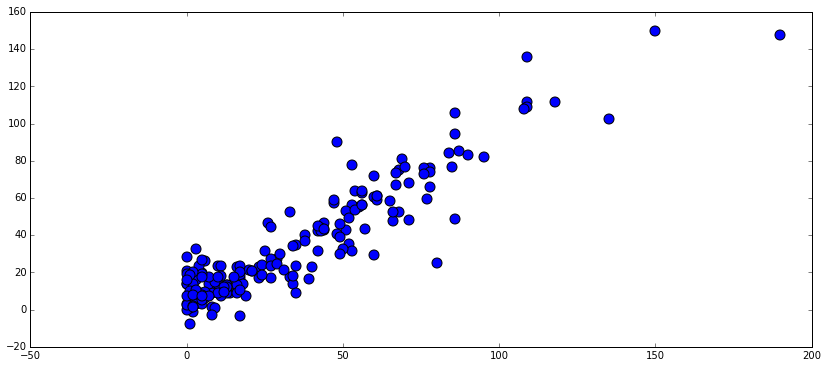

In [14]:
plt.scatter(y, regr.predict(x), s=100)
plt.show()

In [15]:
lass = Lasso(alpha=0.15)
lass.fit(x, y)

Lasso(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=50)

In [17]:
regr = linear_model.LinearRegression()

In [18]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

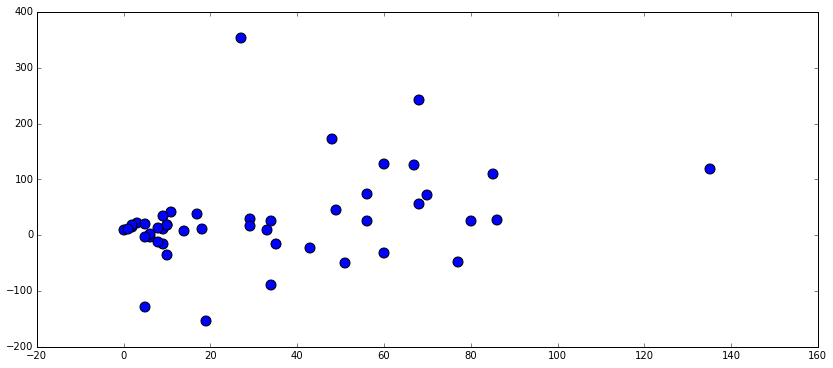

In [19]:
plt.scatter(y_test, regr.predict(x_test), s=100)
plt.show()

In [20]:
regr = linear_model.LinearRegression()

In [21]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

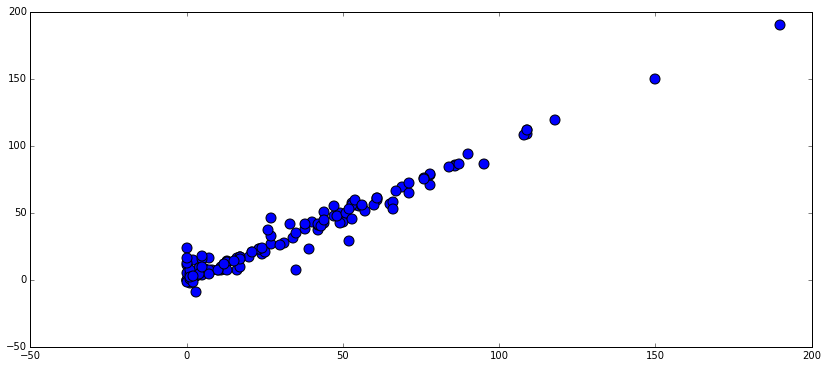

In [22]:
plt.scatter(y_train, regr.predict(x_train), s=100)
plt.show()

###Since we have so many variables, this is a good candidate for regularization. In particular, since we'd like to eliminate a lot of them, lasso seems like a good candidate. Build a lasso model on your training data for various values of alpha. Which variables survive?

In [23]:
lass = Lasso(alpha=.05)
lass.fit(x_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
lass.predict(x_train)[:5]

array([ 20.89469946,  18.90000105,  30.35533763,  71.86816123,  44.0053579 ])

In [25]:
for idx in range(10):
    rand = random()
    lass = Lasso(alpha=float(rand))
    lass.fit(x_train, y_train)
    print 'Alpha={}'.format(float(rand)), lass.predict(x_train)[:5]

Alpha=0.0934774487948 [ 21.29612178  19.54099782  30.85515209  69.68915034  39.7530986 ]
Alpha=0.953997114916 [ 25.4211642   27.41692363  23.72234557  74.58497867  25.82440627]
Alpha=0.323460388245 [ 26.19719427  24.78993801  30.21257022  74.4010893   30.68767499]
Alpha=0.383138450322 [ 26.53215961  27.96709455  30.38543768  75.70976602  29.96232078]
Alpha=0.62587034419 [ 26.29638592  27.71736777  27.97514763  76.8017092   26.5690516 ]
Alpha=0.926774731508 [ 25.44529401  27.43747758  24.11070059  74.79308721  25.74192503]
Alpha=0.110497158914 [ 21.62012489  19.81484349  31.21339748  69.24712403  38.07479847]
Alpha=0.937515120799 [ 25.42446707  27.43146578  23.96265145  74.70422708  25.77048012]
Alpha=0.386630629274 [ 26.55185851  27.96724374  30.4086295   75.76749042  29.90793626]
Alpha=0.662323602123 [ 26.1806236   27.66141241  27.08313833  76.48928047  26.28146494]


###How does this model perform on the test set?

In [26]:
lass = Lasso(alpha=.5)
lass.fit(x_test, y_test)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
lass.predict(x_train)[:5]

array([ 34.03367212,  28.0498293 ,  32.90781279,  29.92721137,  34.1245916 ])

In [28]:
for idx in range(10):
    rand = random()
    lass = Lasso(alpha=float(rand))
    lass.fit(x_test, y_test)
    print 'Alpha={}'.format(float(rand)), lass.predict(x_train)[:5]

Alpha=0.234180777382 [ 39.16844085  22.561077    37.02005717  36.29822325  36.60044656]
Alpha=0.29937652105 [ 37.8485501   23.9770836   36.10760979  36.25143858  36.09271094]
Alpha=0.247051722853 [ 38.90785956  22.79405244  36.6738211   36.53528589  36.55070672]
Alpha=0.726347445867 [ 29.59526575  30.57750264  24.58979513  18.30441546  31.9738929 ]
Alpha=0.139480070485 [ 41.45481156  19.91011544  40.19384977  33.85730937  36.70826058]
Alpha=0.90608580252 [ 28.28708846  30.89991499  21.65852596  16.54226175  31.36023675]
Alpha=0.00397002718739 [  53.81462073    4.22408292   20.34761172   89.87288624  129.37581042]
Alpha=0.946227825969 [ 28.02837377  30.89489169  21.20026762  16.30500873  31.41567473]
Alpha=0.186766403056 [ 40.22726615  21.51179847  37.90638883  35.22037434  36.32396344]
Alpha=0.478697170815 [ 34.4465569   27.87449058  33.8216482   31.43663553  34.28400979]


/Users/jimgrant/.virtualenvs/bikeshare/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


####I honestly have little idea what's happening above here... I also have no idea how to get the data below into a simple linear regression....

###No matter how high I make alpha, the coefficient on crossing ("number of nearby crosswalks") never goes away. Try a simple linear regression on just that variable.

In [45]:
x = avg_station[list(avg_station.columns.values[111:112])]
y = avg_station[list(avg_station.columns.values[1:2])]
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

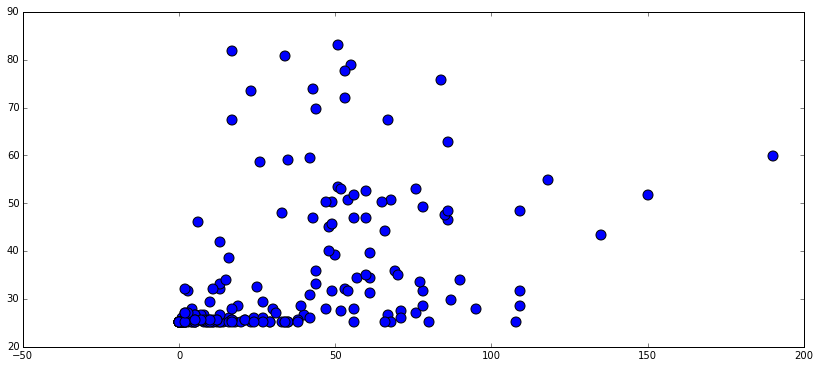

In [46]:
plt.scatter(y, regr.predict(x), s=100)
plt.show()